## Description : 
### The model implemented in the code is a binary classifier that uses the Stochastic Gradient Descent (SGD) algorithm to distinguish between images of the digit 5 and images of the other digits in the MNIST dataset. The classifier is trained on a subset of the data and evaluated using various evaluation metrics, including accuracy, confusion matrix, precision, recall, and F1 score

In [23]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load mnist dataset
mnist = fetch_openml('mnist_784', version = 1)

/home/mostafa/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X.shape

(70000, 784)

In [7]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
y.shape

(70000,)

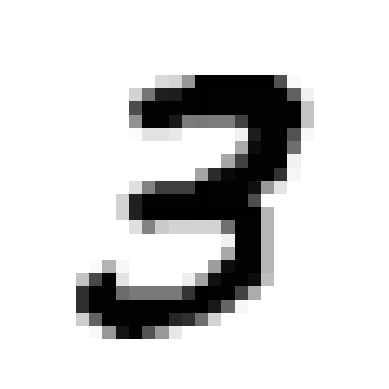

In [9]:
# Show the image on row number 7
some_digit = X.iloc[7].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [10]:
y[7]

'3'

In [11]:
# cast y to integers
y = y.astype(np.uint8)

In [12]:
y[7]

3

In [13]:
# Split data to training set and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Build a Binary Classifier

We need the classifier to pedict if this number 5 or no

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## Training the Model

In [15]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

## Using the Model to detect an image

In [16]:
sgd_clf.predict([some_digit])

/home/mostafa/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

Perfect it return false (some_digit refer to number 3)

## Evaluating the Model

In [17]:
# Cross-Validation
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [18]:
# Confusion Matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
# Precision
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [20]:
# Recall
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [21]:
#F1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## What is value of threshold and recall if we need the precsion to be more than .90 ? 

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [24]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    plt.legend()

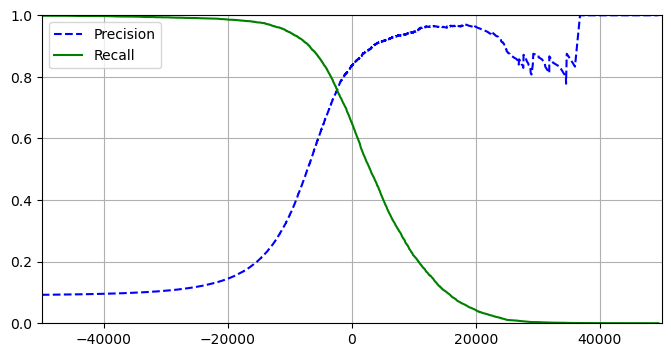

In [40]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [42]:
recall_90_precision = recalls[np.argmax(precisions >= .90)]
recall_90_precision

0.4799852425751706

In [43]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143957